In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 25')

# Se usa la funcion read_csv para leer el archivo . csv
# Tener en cuenta que esta vez el archivo tenia separadores el ;

df = pd.read_csv('bank-additional-full.csv',sep=';')

#### I took the dataset from:
- https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv

### bank client data:
*1 - age (numeric)

*2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

*3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

*4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone")

*9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

*10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

1515 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### social and economic context attributes
*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

__________________________________________________________________________________________________________________________________________


Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

# Análisis basico

In [3]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20181,39,technician,married,high.school,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
7795,26,services,single,basic.9y,no,yes,no,telephone,jun,mon,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
4678,25,services,divorced,high.school,no,yes,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
28901,37,blue-collar,married,basic.4y,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
25633,38,technician,married,professional.course,unknown,no,no,telephone,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Este dataset tiene 11 categorical variables (algunas tienen que ser transformadas) y 10 numerical variables

In [6]:
pd.options.display.float_format='{:.2f}'.format

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.00,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41188.00,258.29,259.28,0.00,102.00,180.00,319.00,4918.00
campaign,41188.00,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41188.00,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41188.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.00,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41188.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41188.00,5167.04,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


In [8]:
df.nunique().sort_values(ascending=False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
job                 12
nr.employed         11
month               10
emp.var.rate        10
previous             8
education            8
day_of_week          5
marital              4
default              3
poutcome             3
loan                 3
housing              3
contact              2
y                    2
dtype: int64

In [9]:
# Validar cuantas celdas en total son nulas

print('Existen' , df.isnull().sum().sum(), ' valores no definidos')
print("Sin embargo, como se verá en el análisis univariable hay celdas unknown")


Existen 0  valores no definidos
Sin embargo, como se verá en el análisis univariable hay celdas unknown


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Análisis univariable

Dado que el dataset está dividido en 5 grupos de variables (
1. Esential bank client data,
2. Related with the last contact of the current campaign,
3. Other attributes, 
4. Social and economic context attributes,
5. Output variable (desired target)) 

haré un análisis univariable a partir de estos grupos.

## - Esential bank client data:

- Esta parte del dataset contiene 7 variables 
una numérica ("Age") y 6 categorical (no definidas)
(job', 'marital', 'education', 'default', 'housing', 'loan').

- Se hace primero el análisis de las variables numéricas y 
despues el de las categoricals

#### Numerical variables

In [11]:
df["age"].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
age,41188.00,40.02,10.42,17.00,32.00,38.00,47.00,98.00


In [12]:
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age=df['age'].mode()[0]

In [13]:
df.groupby('age')['age'].count().sort_values(ascending=False)

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

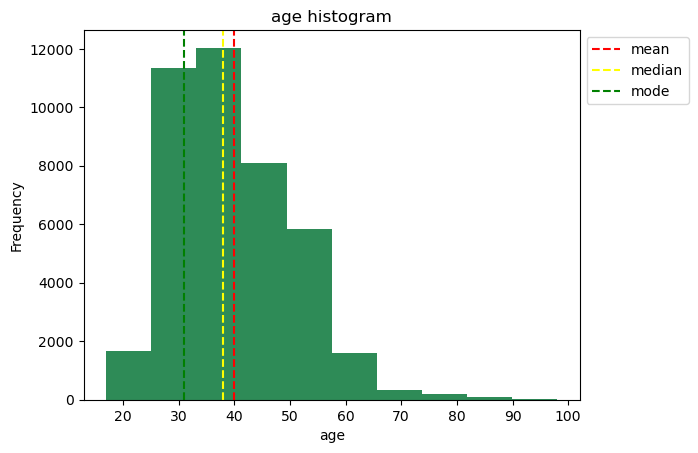

In [14]:
#df.groupby('age')['age'].count().plot.bar()
plt.hist(df['age'],color='seagreen')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('age histogram')
plt.axvline(x=mean_age,color='red', ls='--', label='mean')
plt.axvline(x=median_age,color='yellow',ls='--',label='median')
plt.axvline(x=mode_age,color='green',ls='--',label='mode')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

<AxesSubplot: xlabel='age'>

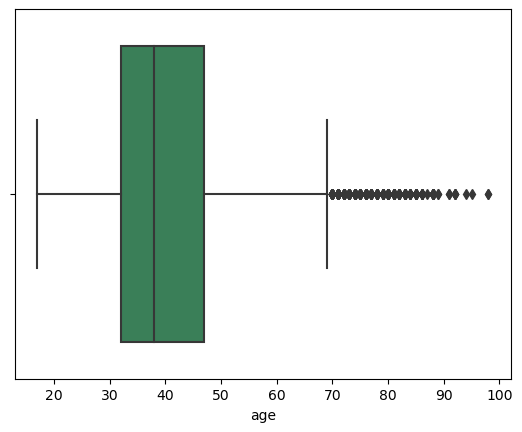

In [15]:
sns.boxplot(x=df['age'],color='seagreen')

#### Categorical variables

In [16]:
firstsetcolumns=['job', 'marital', 'education', 'default', 'housing', 'loan']

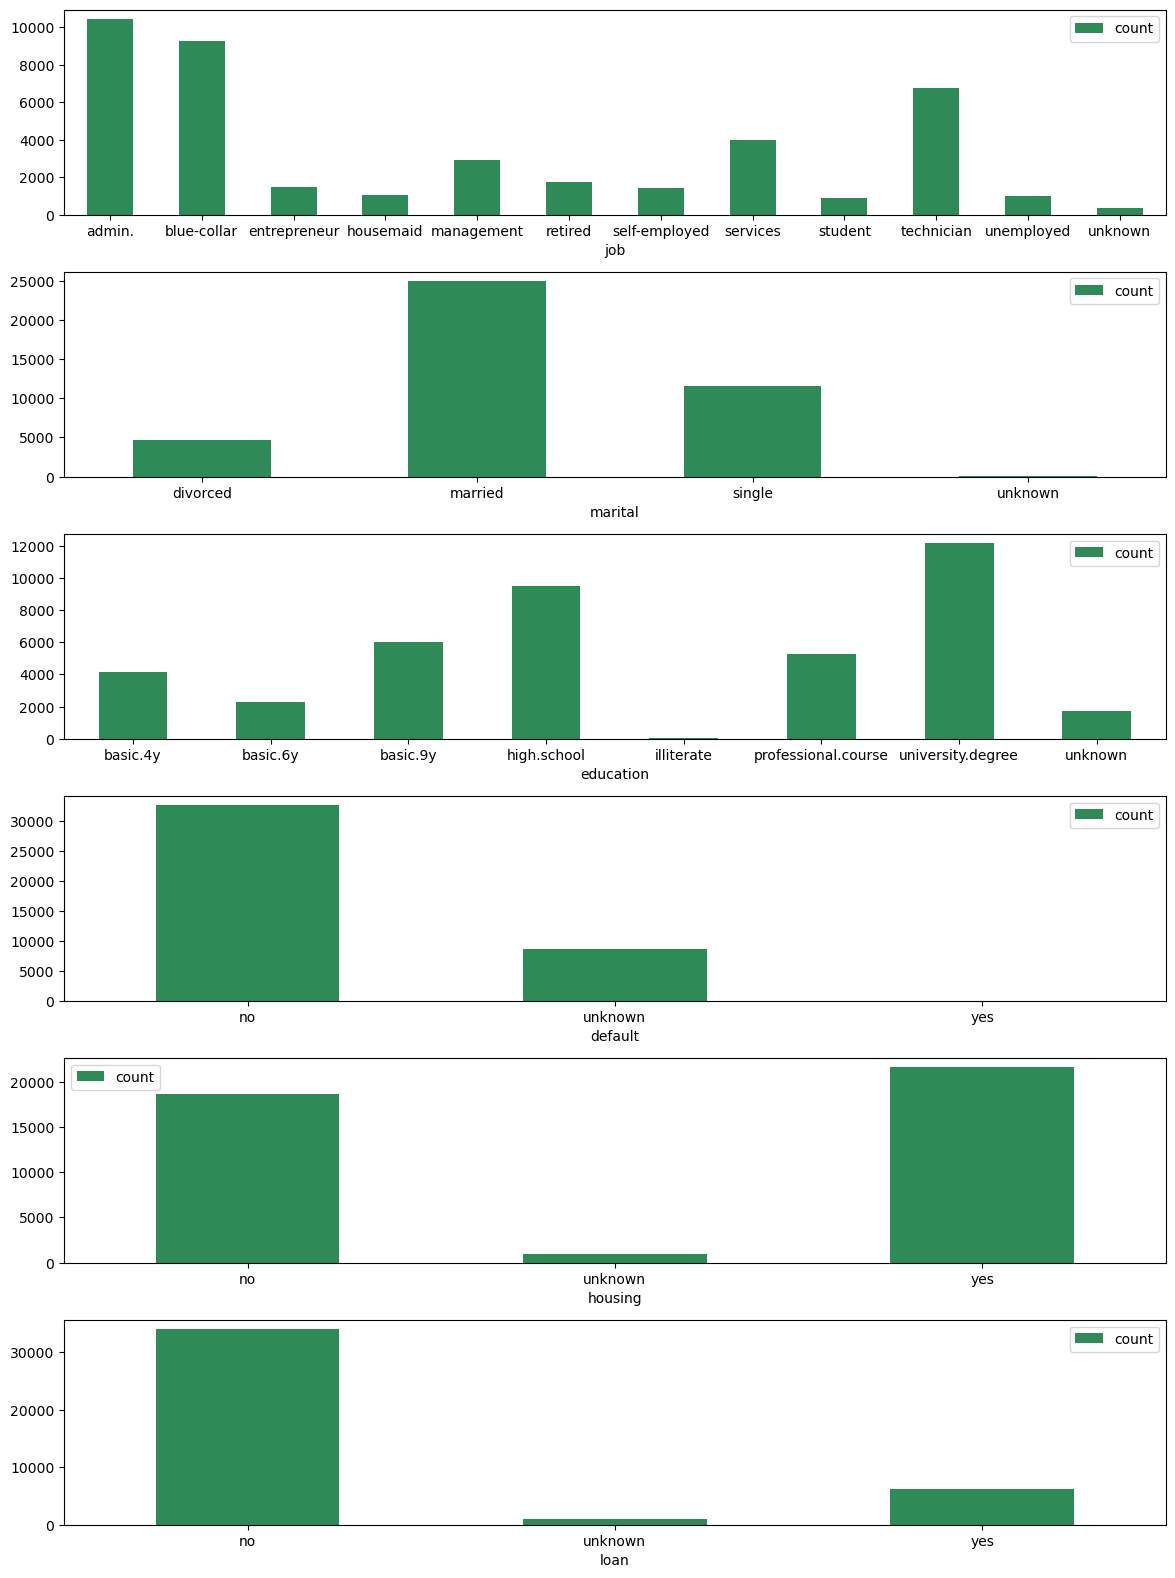

In [17]:
fig, axes = plt.subplots(nrows=6,ncols=1, figsize=(12,16))
fig.tight_layout(pad=2.0)
for i, column in enumerate (firstsetcolumns):

    df_helper= df.groupby(column)[column].count().rename('count').reset_index()
    df_helper.plot.bar(x=column,ax=axes[i],color='seagreen')
    axes[i].tick_params(labelrotation=360)  

### Insights

- La varialbe numérica "age" tiene un sesgo hacia la derecha.
 Para fines del análisis de Machine Learning se tendría que usar logaritmo para corregir ese sesgo.
- Por otro lado el histograma y el boxplot nos permiten ver que la mayor frecuencia esta concentrada
en dos grupos de edad (30 y 40 años) con una dispersión mayor hacia la derecha. 
(los outliers no estan considerablemente lejos del límite)
- Con respecto a las variables de categoría se podría decir que:
    * Un poco más de la mitad de los registros estan casados.
    * Un poco menos de la mitad de los registros tienen un cargo administrativo o industrial manual work (blue-collar'). 
    * Mas o menos la mitad de los registros han terminado el high school o tienen ya una carrera universitaria.
    * La gran parte no tienen un prestamo personal ni estan reportados por credit default.
    * En todas las variables de categoría se tiene como categoria "unknow" que quiere decir para esta preciso dataset valores nulos.
     Por lo cual se tendría que entender que hacer con esos valores.

## Related with the last contact of the current campaign

- Esta parte del dataset contiene 4 variables 
una numérica ("duration") y 3 categorical (no definidas)
('contact', 'month', 'day_of_week').

- Se hace primero el análisis de las variables numéricas y 
despues el de las categoricals

#### Numerical variables

In [18]:
df["duration"].describe().reset_index().T

# Hay que recordar que esta variable esta en segundos

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
duration,41188.00,258.29,259.28,0.00,102.00,180.00,319.00,4918.00


In [19]:
mean_duration = df['duration'].mean()
median_duration = df['duration'].median()
mode_duration=df['duration'].mode()[0]

In [20]:
df.groupby('duration')['duration'].count().sort_values(ascending=False)

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1348      1
1347      1
1345      1
1342      1
4918      1
Name: duration, Length: 1544, dtype: int64

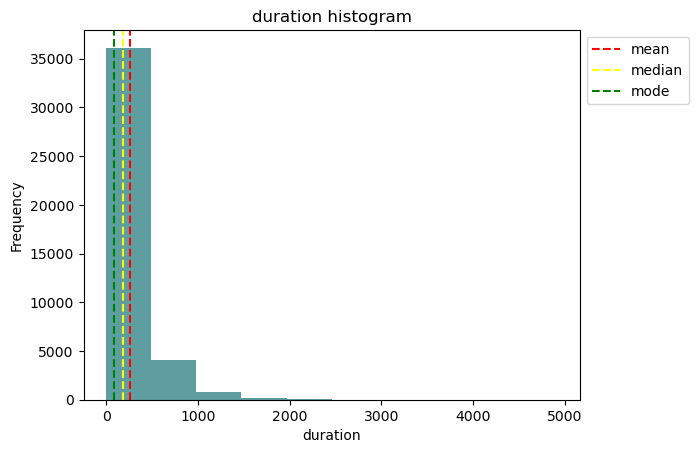

In [21]:
plt.hist(df['duration'], color="cadetblue")
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('duration histogram')
plt.axvline(x=mean_duration,color='red', ls='--', label='mean')
plt.axvline(x=median_duration,color='yellow',ls='--',label='median')
plt.axvline(x=mode_duration,color='green',ls='--',label='mode')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

<AxesSubplot: xlabel='duration'>

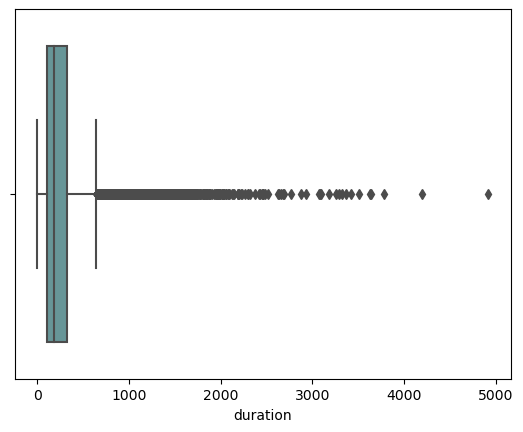

In [22]:
sns.boxplot(x=df['duration'], color="cadetblue")

#### Categorical variables

In [23]:
secondsetcolumns=['contact', 'month', 'day_of_week']

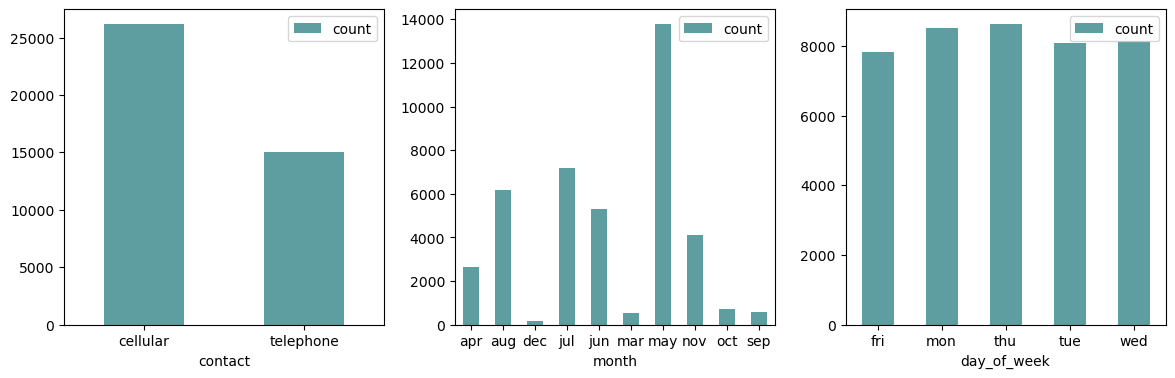

In [24]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(12,4))
fig.tight_layout(pad=2.0)
for i, column in enumerate (secondsetcolumns):

    df_helper= df.groupby(column)[column].count().rename('count').reset_index()
    df_helper.plot.bar(x=column,ax=axes[i], color="cadetblue")
    axes[i].tick_params(labelrotation=360) 

### Insights
- La variable numérica "duration" tiene un sesgo muy pronunciado hacia la derecha.
 Para fines del análisis de Machine Learning se tendría que usar logaritmo para corregir ese sesgo.
- Por otro lado el histograma y el boxplot nos permiten ver que la mayor frecuencia esta concentrada
en los primeros 5 minutos de la llamada con una dispersión mayor hacia la derecha.
- El 50% de las llamadas no dura más de 3 minutos.
- Con respecto a las variables de categoría se podría decir que:
    * Hay una preferencia por hacer las llamadas al celular (mas o menos del 60%) que al telefono.
    * La tercera parte de las llamadas de la campaña actual se hizo en el mes de mayo. 
    * En febrero y marzo no hubo ningún contacto con los clientes. 
    * No hay una preferencia por el día de la semana en el cual se hizo la llamada de contacto.

Con respecto a la variable "duration" es importante tener en cuenta la siguiente informacion:

    * 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes

- Esta parte del dataset contiene 4 variables:
Tres numéricas ('campaign', 'pdays', 'previous') y 1 categorical (no definidas)
('poutcome').

- Se hace primero el análisis de las variables numéricas y 
despues el de las categoricals

### Numerical variables

In [25]:
thirdsetcolumns= ['campaign', 'pdays', 'previous']

In [26]:
df[thirdsetcolumns].describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,41188.00,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41188.00,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00


In [27]:
df.groupby('campaign')['campaign'].count().sort_values(ascending=False)

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [28]:
df.groupby('pdays')['pdays'].count().sort_values(ascending=False)

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [29]:
df.groupby('previous')['previous'].count().sort_values(ascending=False)

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


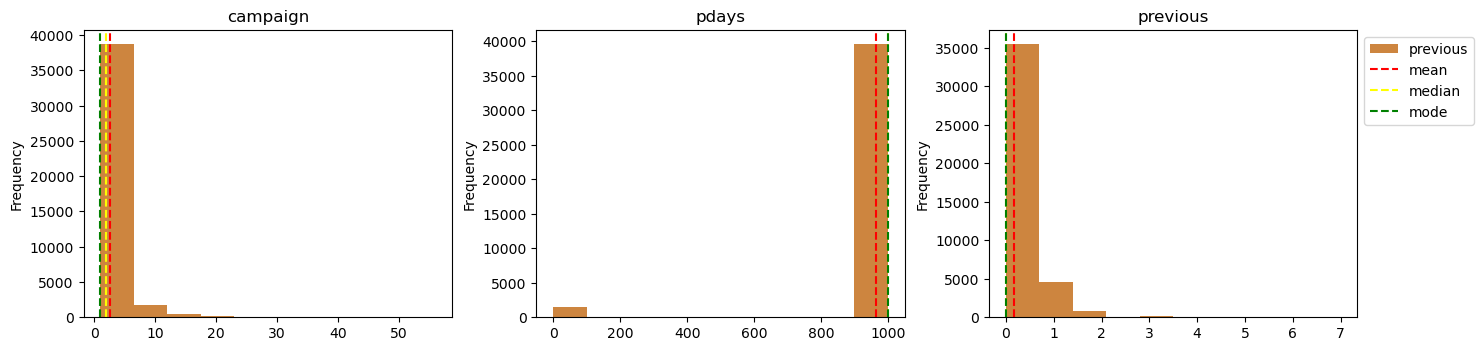

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(14,4))
fig.tight_layout(pad=3.0)
for i, column in enumerate (thirdsetcolumns):
     df[column].plot(kind='hist',ax=axes[i],color='peru')
     axes[i].axvline(x=df[column].mean(),color='red', ls='--', label='mean')
     axes[i].axvline(x=df[column].median(),color='yellow',ls='--',label='median')
     axes[i].axvline(x=df[column].mode()[0],color='green',ls='--',label='mode')
     axes[i].title.set_text(thirdsetcolumns[i])
     plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left') 

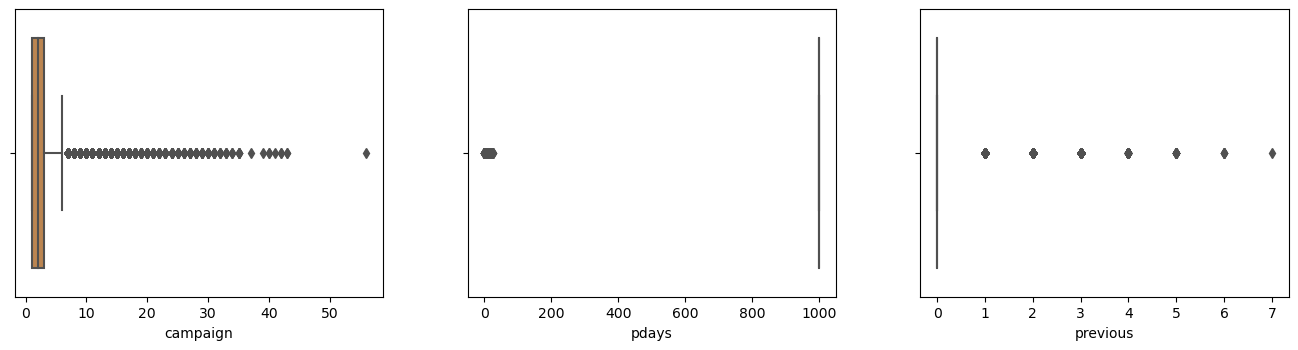

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(14,4))
fig.tight_layout(pad=3.0)
for i, column in enumerate (thirdsetcolumns):
    sns.boxplot(x=df[column], color="peru",ax=axes[i])

### Categorical variables

In [32]:
df.groupby('poutcome')['poutcome'].count()

poutcome
failure         4252
nonexistent    35563
success         1373
Name: poutcome, dtype: int64

<AxesSubplot: xlabel='poutcome'>

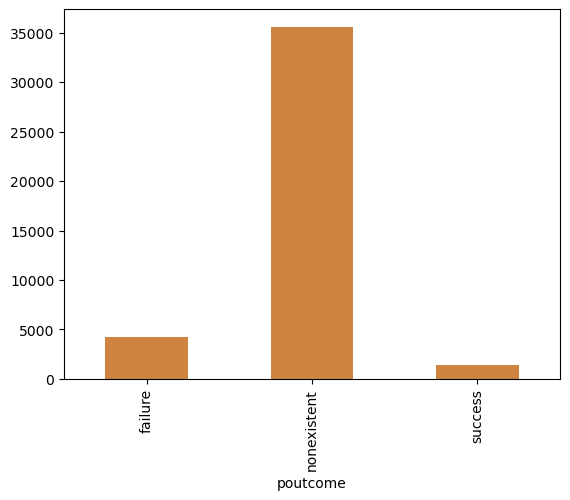

In [33]:
df.groupby('poutcome')['poutcome'].count().plot.bar(color='peru')

### Insights

- Las variables numericas y de categoría de esta sección del dataset no proporcionan información relevante.
    * Entre las variables numericas, "campaign" es la única que arroja información para ser considerada.
    * El 75% de las personas fue contactada en la capaña actual al menos 3 veces. Pero despues se puede observar un sesgo largo hacia la derecha. Por lo cual, si se quiere utilizar esta variable para el modelo de machine learning, se le tendría que realizar una transformación logaritmica.
    * La variable "pdays" no es muy útil ya que entre 27 posibles opciones más del 95% esta concentrado en una sola opción, la cual no es ni siquiera relevante: "999" que quiere decir que el cliente no fue previamente contactado en una campaña anterior.
    * La variable "previous" tiene un comportamiento muy similar a la variable "pdays", ya que más del 85% esta concentrado en una sola opción: "0" que quiere decir que el cliente no fue previamente contactado durante una campaña anterior.
    * La variable de categoria "poutcome" tiene el mismo comportamiento de la variable "previous". Como el 85% de los clientes del dataset actual no fue contactado en la anterior campaña, ese mismo 85% no tiene una respuesta para esta variable.

## - social and economic context attributes

- Esta parte del dataset contiene 5 variables 
todas numéricas ('emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed') 

#### Numerical variables

In [34]:
fourthsetcolumns= ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [35]:
df[fourthsetcolumns].describe().T

,count,mean,std,min,25%,50%,75%,max
emp.var.rate,41188.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.00,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41188.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41188.00,5167.04,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


In [36]:
df.groupby('emp.var.rate')['emp.var.rate'].count().sort_values(ascending=False)

emp.var.rate
1.40     16234
-1.80     9184
1.10      7763
-0.10     3683
-2.90     1663
-3.40     1071
-1.70      773
-1.10      635
-3.00      172
-0.20       10
Name: emp.var.rate, dtype: int64

In [37]:
df.groupby('cons.price.idx')['cons.price.idx'].count().sort_values(ascending=False)

cons.price.idx
93.99    7763
93.92    6685
92.89    5794
93.44    5175
94.47    4374
93.20    3616
93.08    2458
92.20     770
92.96     715
92.43     447
92.65     357
94.22     311
94.20     303
92.84     282
92.38     267
93.37     264
94.03     233
94.06     229
93.88     212
94.60     204
92.47     178
93.75     174
92.71     172
94.77     128
93.80      67
92.76      10
Name: cons.price.idx, dtype: int64

In [38]:
df.groupby('cons.conf.idx')['cons.conf.idx'].count().sort_values(ascending=False)

cons.conf.idx
-36.40    7763
-42.70    6685
-46.20    5794
-36.10    5175
-41.80    4374
-42.00    3616
-47.10    2458
-31.40     770
-40.80     715
-26.90     447
-30.10     357
-40.30     311
-37.50     303
-50.00     282
-29.80     267
-34.80     264
-38.30     233
-39.80     229
-40.00     212
-49.50     204
-33.60     178
-34.60     174
-33.00     172
-50.80     128
-40.40      67
-45.90      10
Name: cons.conf.idx, dtype: int64

In [39]:
df.groupby('euribor3m')['euribor3m'].count().sort_values(ascending=False)

euribor3m
4.86    2868
4.96    2613
4.96    2487
4.96    1902
4.86    1210
        ... 
1.05       1
1.04       1
3.49       1
3.43       1
3.85       1
Name: euribor3m, Length: 316, dtype: int64

In [40]:
df.groupby('nr.employed')['nr.employed'].count().sort_values(ascending=False)

nr.employed
5228.10    16234
5099.10     8534
5191.00     7763
5195.80     3683
5076.20     1663
5017.50     1071
4991.60      773
5008.70      650
4963.60      635
5023.50      172
5176.30       10
Name: nr.employed, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


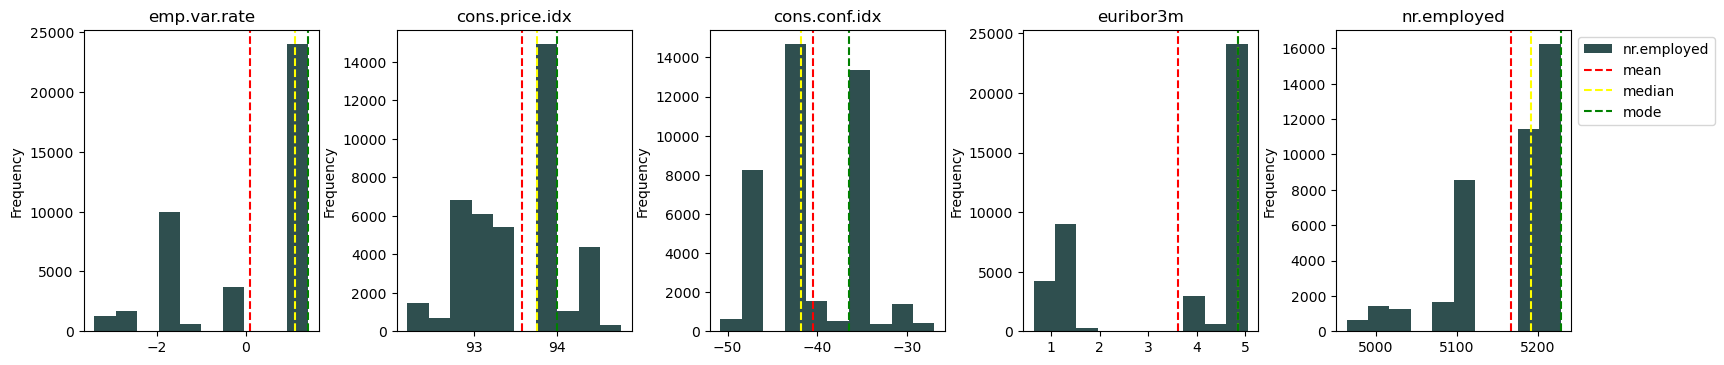

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(16,4))
fig.tight_layout(pad=2.5)
for i, column in enumerate (fourthsetcolumns):
     df[column].plot(kind='hist',ax=axes[i],color='darkslategrey')
     axes[i].axvline(x=df[column].mean(),color='red', ls='--', label='mean')
     axes[i].axvline(x=df[column].median(),color='yellow',ls='--',label='median')
     axes[i].axvline(x=df[column].mode()[0],color='green',ls='--',label='mode')
     axes[i].title.set_text(fourthsetcolumns[i])
     plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

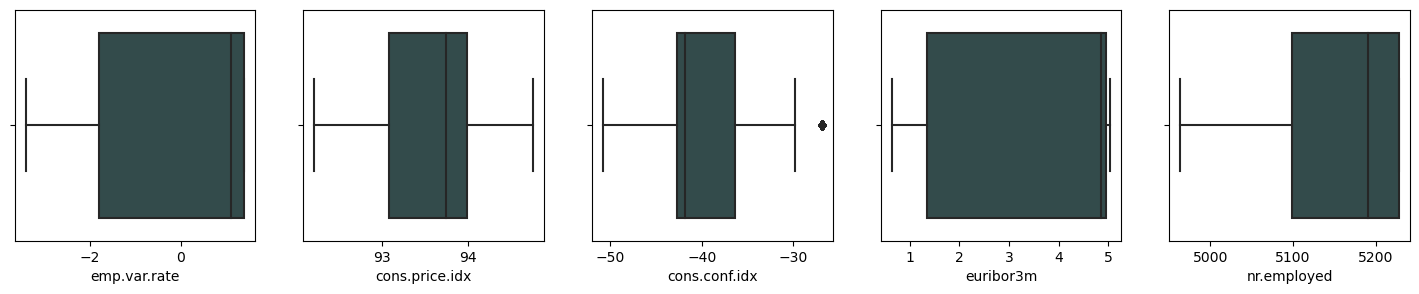

In [42]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(18,3))
#fig.tight_layout(pad=1.0)
for i, column in enumerate (fourthsetcolumns):
    sns.boxplot(x=df[column], color="darkslategrey",ax=axes[i])

# Field Engineering

- Habiendo ya hecho un primer análisis univariado al dataset estas son las modificaciones que le haría:

    * Eliminar todos los datos "unkowns" de las variables 'job', 'marital', 'education', 'default', 'housing', 'loan'.
    * Cambiar el formato de las variables 'job', 'marital', 'education','contact','month','day_of_week','poutcome' de object a categorical.
    * Cambiar el formato de las variables housing, loan, y, de object a binary (int64).

Seguramente déspues de hacer la corelación tendré que considerar si realizar más cambios o no.

### Eliminar todos los datos "unkowns" de las variables 'job', 'marital', 'education', 'default', 'housing', 'loan'.

In [43]:
df.loc[(df['job']=='unknown') | (df['marital']=='unknown')| (df['education']=='unknown') | (df['housing']=='unknown')| (df['loan']=='unknown')]
#(df['default']=='unknown')| 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.10,94.77,-50.80,1.05,4963.60,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.05,4963.60,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.10,94.77,-50.80,1.05,4963.60,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.10,94.77,-50.80,1.04,4963.60,no


In [44]:
default_unknown= df.loc[df['default']=='unknown']['default'].count()
default_unknown

8597

In [45]:
total_unknown = df.loc[(df['job']=='unknown') | (df['marital']=='unknown')| (df['education']=='unknown')| (df['housing']=='unknown')| (df['loan']=='unknown')]['age'].count() 
total_unknown

2943

In [46]:
# Cuantos datos totales tenemos, y cuantos missing
total_rows = df.shape[0]
# Calculo del porcentaje
percent_missing = (total_unknown/total_rows)*100
print(f' % de filas a ser eliminadas: {percent_missing:.2f} % sin tener en cuenta los valores nulos de la variable default')
print(f'ya que solo los valores nulos de esa variable equivalen al {(default_unknown/total_rows)*100:.2f}% ')

 % de filas a ser eliminadas: 7.15 % sin tener en cuenta los valores nulos de la variable default
ya que solo los valores nulos de esa variable equivalen al 20.87% 


In [70]:
df1 = df.loc[(df['job']!='unknown') & (df['marital']!='unknown')& (df['education']!='unknown')& (df['housing']!='unknown')& (df['loan']!='unknown')]
df1
# Ahora usare df1 para realizar las siguientes transformaciones.
# Recordar que no se eliminaron los valores nulos de la variable "default"
# ya que en termino de columnas equivalian al 21% del total de las columnas.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [71]:
total_unknown = df1.loc[(df1['job']=='unknown') | (df1['marital']=='unknown')| (df1['education']=='unknown')| (df1['housing']=='unknown')| (df1['loan']=='unknown')]['age'].count() 
total_unknown

0

### Cambiar el formato de las variables 'job', 'marital', 'education','contact','month','day_of_week','poutcome' de object a categorical.

In [72]:
df1['job']= df1['job'].astype('category')
df1['marital']= df1['marital'].astype('category')
df1['education']= df1['education'].astype('category')
df1['contact']= df1['contact'].astype('category')
df1['month']= df1['month'].astype('category')
df1['day_of_week']= df1['day_of_week'].astype('category')
df1['poutcome']= df1['poutcome'].astype('category')

C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\33159217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['job']= df1['job'].astype('category')
C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\33159217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['marital']= df1['marital'].astype('category')
C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\33159217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [73]:
df1.dtypes

age                  int64
job               category
marital           category
education         category
default             object
housing             object
loan                object
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

###  Cambiar el formato de las variables housing, loan, y, de object a binary (int64).

In [74]:
df1.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10878,56,retired,married,high.school,unknown,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,no
12059,58,services,married,high.school,no,no,no,telephone,jun,fri,...,1,999,0,nonexistent,1.40,94.47,-41.80,4.95,5228.10,no
31100,27,services,married,high.school,no,yes,no,cellular,may,wed,...,1,999,1,failure,-1.80,92.89,-46.20,1.33,5099.10,no
28517,45,blue-collar,married,basic.9y,unknown,yes,no,cellular,apr,tue,...,4,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
22002,53,admin.,married,high.school,no,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no


In [75]:
df1.loc[df1["housing"] == "no", "housing"] = 0
df1.loc[df1["housing"] == "yes", "housing"] = 1
df1.loc[df1["loan"] == "no", "loan"] = 0
df1.loc[df1["loan"] == "yes", "loan"] = 1
df1.loc[df1["y"] == "no", "y"] = 0
df1.loc[df1["y"] == "yes", "y"] = 1

In [76]:
df1['housing']= df1['housing'].astype('int64')
df1['loan']= df1['loan'].astype('int64')
df1['y']= df1['y'].astype('int64')

C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\1935625931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['housing']= df1['housing'].astype('int64')
C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\1935625931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan']= df1['loan'].astype('int64')
C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\1935625931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [77]:
df1.dtypes

age                  int64
job               category
marital           category
education         category
default             object
housing              int64
loan                 int64
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object

### Insights

- La única variable que no fue cambiada fue default ya que tiene muchos valores nulos.
- Ahora se procede a realizar la correlación

## Correlación y heat map

In [78]:
df1.corr('pearson').style.background_gradient(cmap='Greens')

C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\2244973319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr('pearson').style.background_gradient(cmap='Greens')


,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.000291,-0.006390,0.002405,0.005519,-0.038476,0.028479,-0.003563,-0.001236,0.127644,0.007695,-0.021054,0.030130
housing,0.000291,1.000000,0.045077,-0.009104,-0.010817,-0.009370,0.020837,-0.060675,-0.080849,-0.034437,-0.059595,-0.046513,0.009996
loan,-0.006390,0.045077,1.000000,0.000280,0.003914,0.001874,-0.003268,0.002336,-0.003146,-0.012992,0.000317,0.004088,-0.005603
duration,0.002405,-0.009104,0.000280,1.000000,-0.071110,-0.044278,0.016304,-0.025003,0.007530,-0.008656,-0.029029,-0.040722,0.405832
campaign,0.005519,-0.010817,0.003914,-0.071110,1.000000,0.051536,-0.078478,0.150752,0.128665,-0.010713,0.134783,0.143150,-0.065117
pdays,-0.038476,-0.009370,0.001874,-0.044278,0.051536,1.000000,-0.581303,0.268705,0.080828,-0.090587,0.291953,0.366783,-0.319351
previous,0.028479,0.020837,-0.003268,0.016304,-0.078478,-0.581303,1.000000,-0.419647,-0.208783,-0.056856,-0.450672,-0.494617,0.221159
emp.var.rate,-0.003563,-0.060675,0.002336,-0.025003,0.150752,0.268705,-0.419647,1.000000,0.775418,0.211865,0.972422,0.907920,-0.292265
cons.price.idx,-0.001236,-0.080849,-0.003146,0.007530,0.128665,0.080828,-0.208783,0.775418,1.000000,0.070521,0.689600,0.524272,-0.133084
cons.conf.idx,0.127644,-0.034437,-0.012992,-0.008656,-0.010713,-0.090587,-0.056856,0.211865,0.070521,1.000000,0.292641,0.115583,0.051424


C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\3742943591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df1.corr(),dtype=bool))
C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\3742943591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df1.corr(),mask=mask, vmin=-1,annot=True,cmap='BrBG')


Text(0.5, 1.0, 'Mapa de Calor de Triangulo de Correlacion')

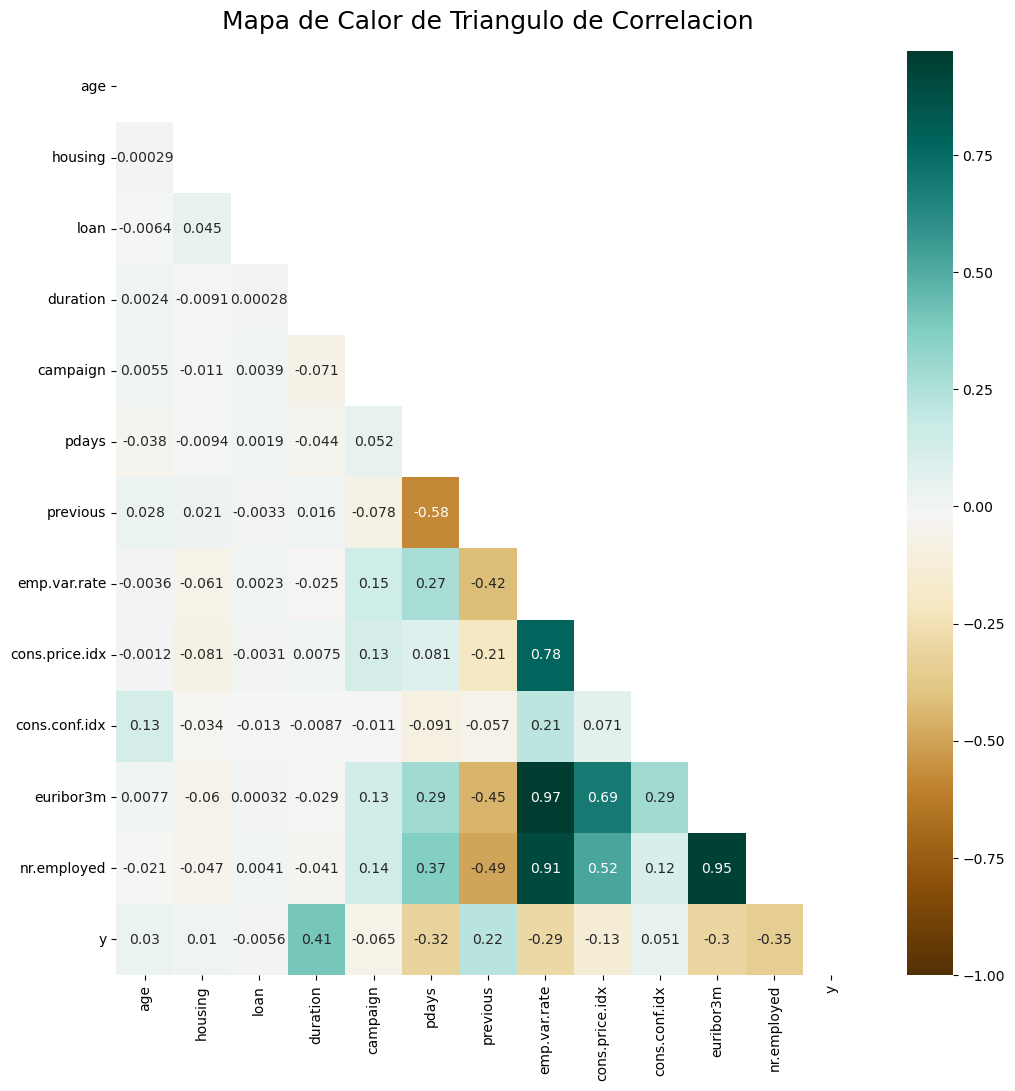

In [79]:
plt.figure(figsize=(12,12))
mask=np.triu(np.ones_like(df1.corr(),dtype=bool))
heatmap=sns.heatmap(df1.corr(),mask=mask, vmin=-1,annot=True,cmap='BrBG')
heatmap.set_title('Mapa de Calor de Triangulo de Correlacion', fontdict={'fontsize':18},pad=16)

In [90]:
# Dado que existe multicolinearidad entre algunas variables independientes,
# las elimino para ver como se comporta el modelo sin ellas.

In [132]:
df2=df1.drop(['emp.var.rate','euribor3m'],axis=1)
df2.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
8324,49,management,divorced,university.degree,unknown,1,0,telephone,jun,tue,165,3,999,0,nonexistent,94.47,-41.80,5228.10,0
26125,31,entrepreneur,married,university.degree,no,0,0,telephone,nov,wed,723,2,999,0,nonexistent,93.20,-42.00,5195.80,0
17279,54,admin.,married,university.degree,unknown,0,0,cellular,jul,fri,67,3,999,0,nonexistent,93.92,-42.70,5228.10,0
8503,58,admin.,single,university.degree,no,0,1,telephone,jun,wed,111,3,999,0,nonexistent,94.47,-41.80,5228.10,0
31716,47,management,married,university.degree,unknown,1,0,cellular,may,thu,72,1,999,0,nonexistent,92.89,-46.20,5099.10,0


C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\3122278506.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df2.corr(),dtype=bool))
C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\3122278506.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df2.corr(),mask=mask, vmin=-1,annot=True,cmap='BrBG')


Text(0.5, 1.0, 'Mapa de Calor de Triangulo de Correlacion')

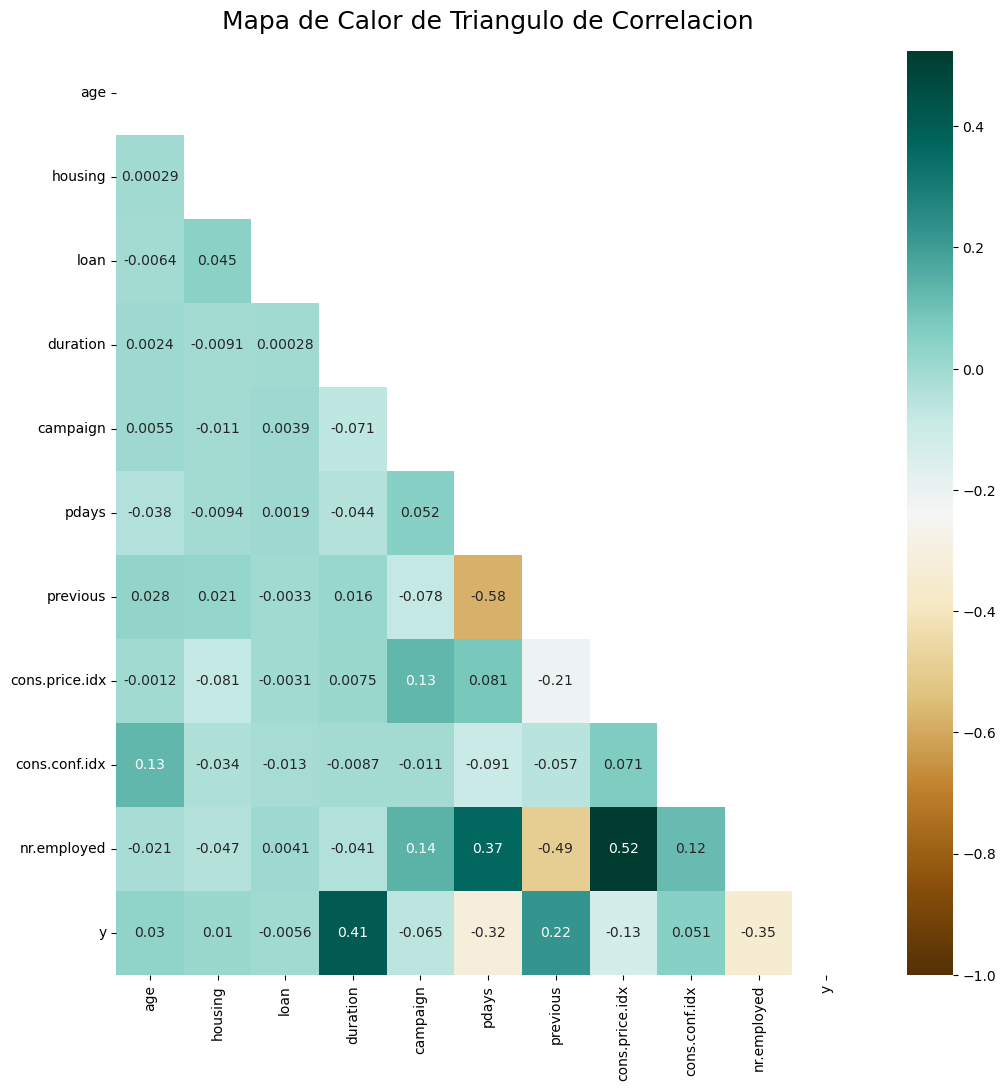

In [133]:
plt.figure(figsize=(12,12))
mask=np.triu(np.ones_like(df2.corr(),dtype=bool))
heatmap=sns.heatmap(df2.corr(),mask=mask, vmin=-1,annot=True,cmap='BrBG')
heatmap.set_title('Mapa de Calor de Triangulo de Correlacion', fontdict={'fontsize':18},pad=16)

In [92]:
# Ya no tengo la multicolineraidad entre las variables independientes.
# El dataframe final es df2

## Analisis univariado y bivariado basado en la predicción (y/n)

<AxesSubplot: title={'center': 'Response variable bar chart'}, xlabel='y'>

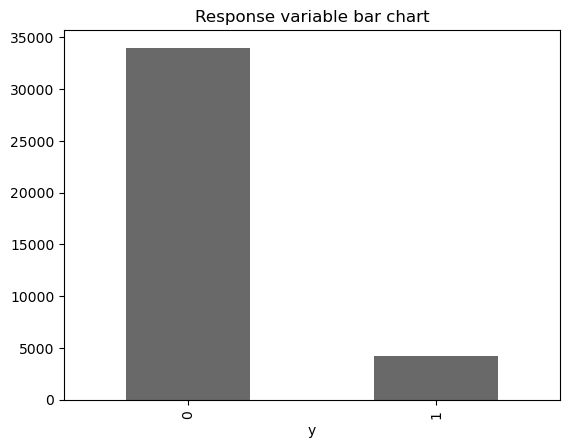

In [134]:
df2.groupby('y')['y'].count().plot.bar(color='dimgrey',title='Response variable bar chart')

In [135]:
neg_answer=sum(df2.y == 0)
pos_answer=sum(df2.y == 1)
total_answer= neg_answer + pos_answer
print(f'El porcentaje de personas que aceptaron la campana es de {(pos_answer/total_answer)*100:.2f}%')

El porcentaje de personas que aceptaron la campana es de 11.13%


In [136]:
df2.groupby(['y']).median().T

C:\Users\oscah\AppData\Local\Temp\ipykernel_8532\1785912231.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['y']).median().T


y,0,1
age,38.00,37.00
housing,1.00,1.00
loan,0.00,0.00
duration,164.00,453.50
campaign,2.00,2.00
pdays,999.00,999.00
previous,0.00,0.00
cons.price.idx,93.92,93.20
cons.conf.idx,-41.80,-40.80
nr.employed,5195.80,5099.10


In [127]:
# No se persive una gran diferencia entre las dos columnas de variables de respuesta

In [128]:
# Antes de hacer la separacion del Dataframe se elimina la columna duration 
# ya que era aconsejado por el propiertario del dataset (para usos de prediccion):

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [137]:
df2.drop(['duration'],axis=1,inplace=True)
# Final dataframe
df2.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
16352,27,blue-collar,single,basic.9y,unknown,0,0,cellular,jul,wed,8,999,0,nonexistent,93.92,-42.70,5228.10,0
23800,50,blue-collar,married,basic.4y,unknown,1,0,cellular,aug,fri,1,999,0,nonexistent,93.44,-36.10,5228.10,0
17285,52,blue-collar,married,basic.9y,unknown,0,1,cellular,jul,fri,3,999,0,nonexistent,93.92,-42.70,5228.10,0
33135,28,services,single,high.school,no,1,1,cellular,may,tue,5,999,0,nonexistent,92.89,-46.20,5099.10,0
15910,31,blue-collar,married,basic.9y,no,1,1,cellular,jul,mon,3,999,0,nonexistent,93.92,-42.70,5228.10,0


### Dividir dataset entre training y test (70:30)

In [138]:
# Libreria de Split
from sklearn.model_selection import train_test_split

x = df2.drop('y',axis=1) 
y = df2['y']
#Se divide a X y Y en un ratio 70:30

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [139]:
x.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
40500,32,admin.,married,university.degree,no,0,0,telephone,aug,fri,1,999,0,nonexistent,94.03,-38.30,4991.60
18646,33,admin.,single,professional.course,no,1,0,cellular,jul,thu,2,999,0,nonexistent,93.92,-42.70,5228.10
22653,35,technician,single,professional.course,no,0,1,cellular,aug,fri,4,999,0,nonexistent,93.44,-36.10,5228.10
26460,53,technician,married,professional.course,no,0,0,cellular,nov,thu,2,999,1,failure,93.20,-42.00,5195.80
25492,38,admin.,married,high.school,no,1,0,telephone,nov,wed,1,999,0,nonexistent,93.20,-42.00,5195.80


In [140]:
y.sample(5)

26784    0
29640    0
21237    0
3685     1
29677    0
Name: y, dtype: int64

In [141]:
x_train.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
7478,50,technician,married,professional.course,no,1,0,telephone,may,fri,2,999,0,nonexistent,93.99,-36.40,5191.00
7047,33,blue-collar,married,basic.9y,no,0,0,telephone,may,thu,1,999,0,nonexistent,93.99,-36.40,5191.00
24476,44,management,married,university.degree,no,1,0,cellular,nov,mon,1,999,0,nonexistent,93.20,-42.00,5195.80


In [142]:
print('{0:0.2f}% data is in training set'.format((len(x_train)/len(df2.index))*100))
print('{0:0.2f}% data is in test set'.format((len(x_test)/len(df2.index))*100))

70.00% data is in training set
30.00% data is in test set


In [145]:
# Validacion de la estructura de los datasets
# En este caso la variable "Response" tiene 15/85 en cuanto a 1/0 y deberia perdurar en el Original, training y testing
# Esa es justamente la idea de hacer el split
print('Original campaign True Values : {0} ({1:0.2f}%)'.format(len(df2.loc[df2['y']==1]),(len(df2.loc[df2['y']==1])/len(df2.index))*100))
print('Original campaign False Values : {0} ({1:0.2f}%)'.format(len(df2.loc[df2['y']==0]),(len(df2.loc[df2['y']==0])/len(df2.index))*100))
print('')
print('Original campaign True Values : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==1]),(len(y_train[y_train[:]==1])/len(y_train.index))*100))
print('Original campaign False Values : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==0]),(len(y_train[y_train[:]==0])/len(y_train.index))*100))
print('')
print('Original campaign True Values : {0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==1]),(len(y_test[y_test[:]==1])/len(y_test.index))*100))
print('Original campaign False Values : {0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==0]),(len(y_test[y_test[:]==0])/len(y_test.index))*100))

Original campaign True Values : 4258 (11.13%)
Original campaign False Values : 33987 (88.87%)

Original campaign True Values : 2982 (11.14%)
Original campaign False Values : 23789 (88.86%)

Original campaign True Values : 1276 (11.12%)
Original campaign False Values : 10198 (88.88%)
